# HW-1 Solution: Bikash Kharel

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time

In [2]:
! [ -e ./slimmed_realestate_data.csv ] || wget https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
data = pd.read_csv('slimmed_realestate_data.csv')
print(data.columns)

Index(['Unnamed: 0', 'SalePrice', 'GrLivArea'], dtype='object')


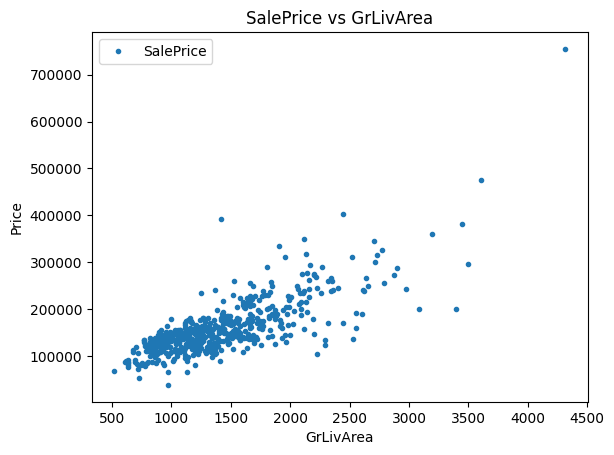

In [3]:
data.plot(x='GrLivArea', y='SalePrice',style='.')
plt.title('SalePrice vs GrLivArea')
plt.ylabel('Price')
plt.show()

## Solving by analytical method

In [4]:
n = len(data)
print(n)

551


In [5]:
x = data['GrLivArea'].to_numpy()
y = data['SalePrice'].to_numpy()

In [6]:
sum_xy = np.sum(x*y)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x*x)

In [7]:
denominator = n * sum_x2 - sum_x * sum_x

In [8]:
m = (n * sum_xy - sum_x * sum_y) / denominator
b = (sum_y * sum_x2 - sum_x * sum_xy) / denominator
print('y = %f * x + %f' % (m,b))

# saving these for later comparison
m_calc = m
b_calc = b

y = 87.688145 * x + 34754.077892


In [9]:
def plot_data(x,y,m,b,plt = plt):
    # plot our data points with 'bo' = blue circles
    plt.scatter(x,y, label='Data', c='b', alpha=0.5)
    # create the line based on our linear fit
    # first we need to make x points
    # the 'arange' function generates points between two limits (min,max)
    linear_x = np.arange(x.min(),x.max())
    # now we use our fit parameters to calculate the y points based on our x points
    linear_y = linear_x * m + b
    # plot the linear points using 'r-' = red line
    plt.plot(linear_x,linear_y,'r-',label='Analytic Model', linewidth=2.5)
    plt.legend()
    

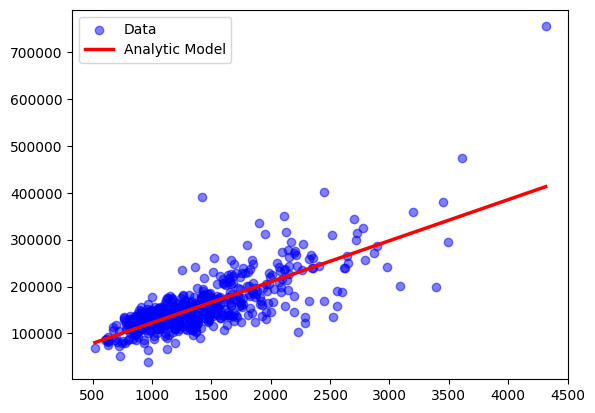

In [10]:
plot_data(x,y,m,b)

### Solving by Stochastic Gradient Descent

In [12]:
# Define the model function
def model(x,m,b):
   return m * x + b

In [13]:
# Define the loss function
def loss(x,y,m,b):
   y_predicted = model(x,m,b)
   return np.power( y - y_predicted, 2 )


In [14]:
# Define update functions for slope and the bias term
def updated_m(x,y,m,b,learning_rate):
   dL_dm = - 2 * x * (y - model(x,m,b))
   dL_dm = np.mean(dL_dm)
   return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
   dL_db = - 2 * (y - model(x,m,b))
   dL_db = np.mean(dL_db)
   return b - learning_rate * dL_db

#### Part -1: Mini batch training

Batch Size: 32
Analytic Model: y_i = 87.6881454948481 * x + 34754.077891844456
SGD Model: y_i = 90.49702238452667 * x + 37934.79840657239
Mean Loss: 2488890041.231819


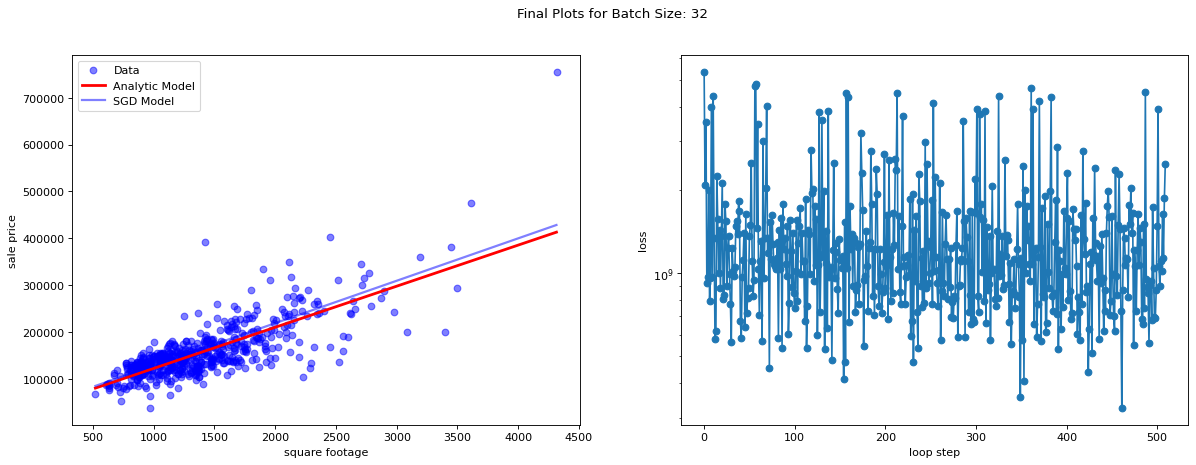

Batch Size: 64
Analytic Model: y_i = 87.6881454948481 * x + 34754.077891844456
SGD Model: y_i = 90.18116544971099 * x + 36568.79959384562
Mean Loss: 1257655808.2184677


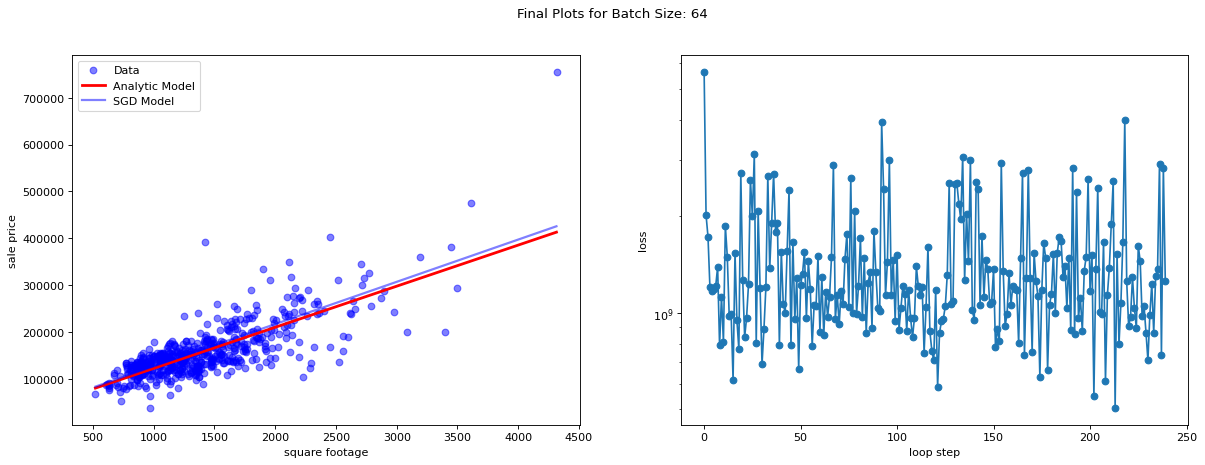

Batch Size: 128
Analytic Model: y_i = 87.6881454948481 * x + 34754.077891844456
SGD Model: y_i = 88.71999120614424 * x + 32980.92807876587
Mean Loss: 1004554703.1437382


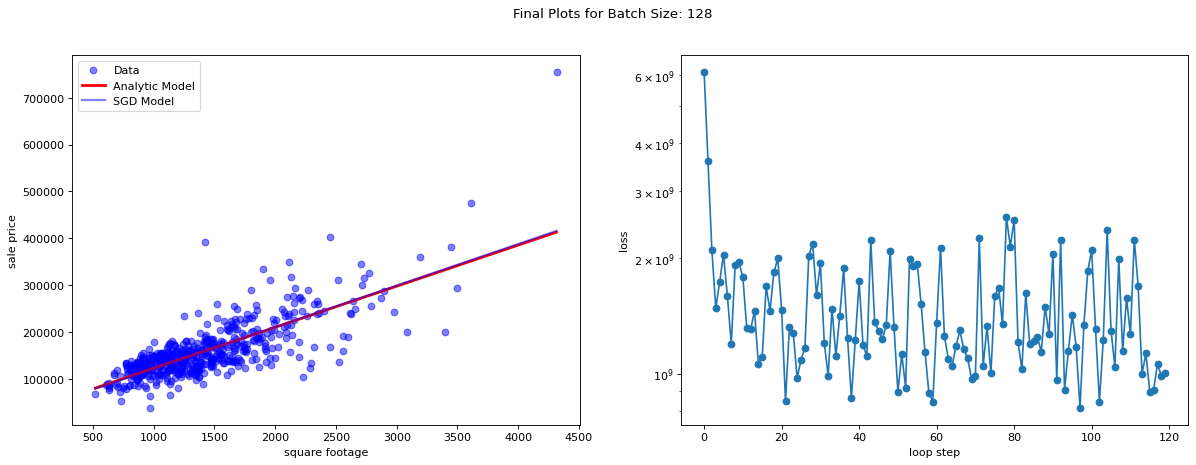

Batch Size: 256
Analytic Model: y_i = 87.6881454948481 * x + 34754.077891844456
SGD Model: y_i = 88.01165238662635 * x + 33486.21208555923
Mean Loss: 1220495583.712838


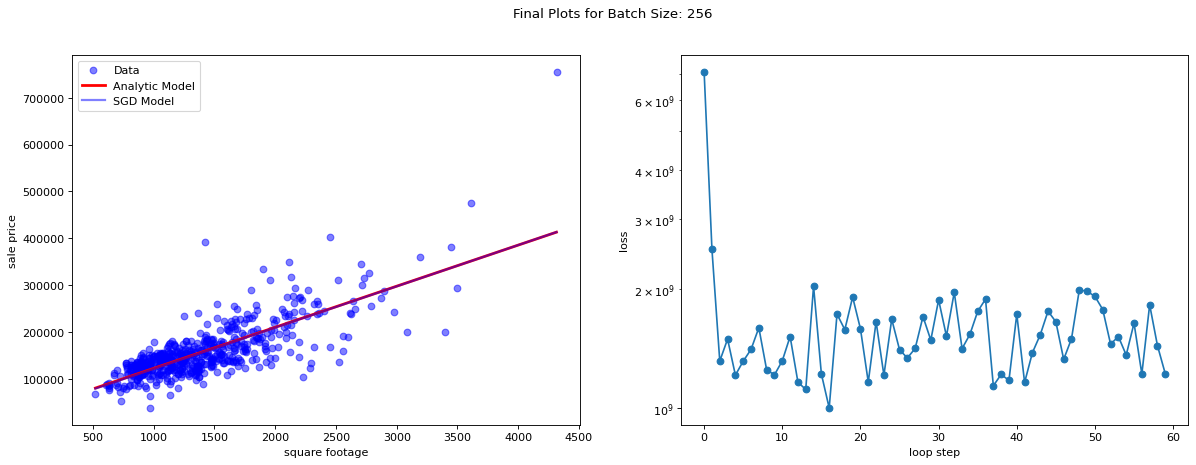

Batch Size: 512
Analytic Model: y_i = 87.6881454948481 * x + 34754.077891844456
SGD Model: y_i = 88.16311581797616 * x + 32994.01103844458
Mean Loss: 1231554728.2005827


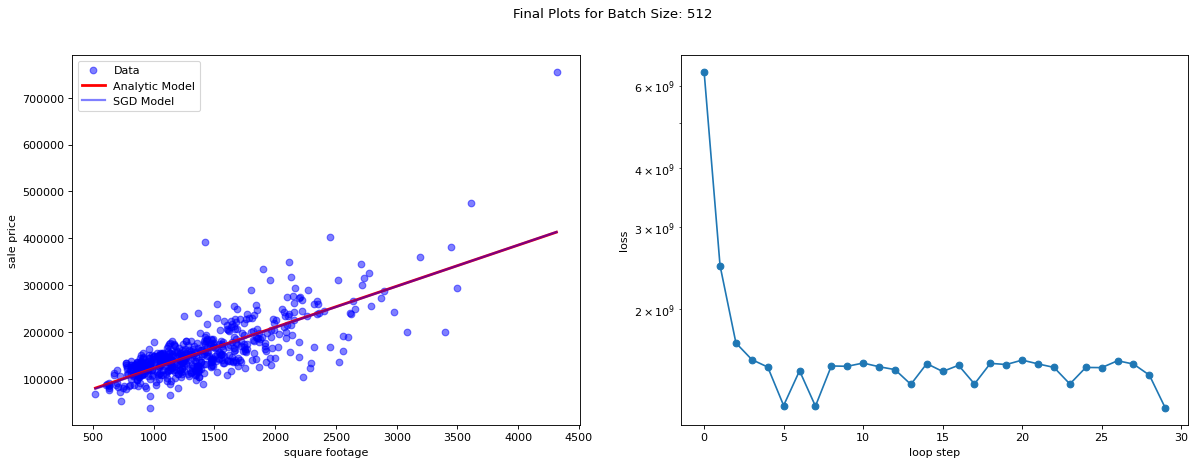

In [15]:
# set the array of batch sizes 
batch_sizes = [32, 64, 128, 256, 512]

# set the number of epochs
epochs = 30

# Now performing SGD for each of the batch size
for batch_size in batch_sizes:
    # set the initial values of m and b inside of this loop so that
    # they are reset to original guess values for each batch size
    m = 5.
    b = 1000.
    
    # Print the batch size
    print(100*'=')
    print(f"Batch Size: {batch_size}")
    
    # obtain the number of iterations
    num_iterations = len(data)//batch_size
    
    
    # set a learning rate for each parameter
    learning_rate_m = 1e-7
    learning_rate_b = 1e-1
    
    
    # use these to plot our progress over time
    loss_history = []
    
    # the number of times entire dataset is trained is the epochs
    loop_N = epochs
    
    
    for i in range(loop_N):
        
        for j in range(num_iterations):
    
            # Sample a batch of data according to batch size
            data_batch = data.sample(batch_size)
            
             # convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
            data_x = data_batch['GrLivArea'].to_numpy()
            data_y = data_batch['SalePrice'].to_numpy()
    
            # update our slope and intercept based on the current values
            m = updated_m(data_x,data_y,m,b,learning_rate_m)
            b = updated_b(data_x,data_y,m,b,learning_rate_b)

            # calculate the loss value
            loss_value = np.mean(loss(data_x,data_y,m,b))

            # keep a history of our loss values
            loss_history.append(loss_value)

            # close/delete previous plots
            # plt.close('all')
            
            if (i == loop_N-1  and j == num_iterations-1):
                print(f"Analytic Model: y_i = {m_calc} * x + {b_calc}")
                print(f"SGD Model: y_i = {m} * x + {b}")
                print(f"Mean Loss: {loss_value}")
                # print(100*'*')
                # create a 1 by 2 plot grid
                fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
                # lot our usual output
                plot_data(data['GrLivArea'],data['SalePrice'], m_calc, b_calc, ax[0])

                # here we also plot the SGD linear fit for comparison
                line_x = np.arange(data['GrLivArea'].min(), data['GrLivArea'].max())
                line_y = line_x * m + b
                ax[0].plot(line_x,line_y,label='SGD Model', linewidth=2, alpha=0.5, color='b')
                # add a legend to the plot and x/y labels
                ax[0].legend()
                ax[0].set_xlabel('square footage')
                ax[0].set_ylabel('sale price')

                # plot the loss 
                loss_x = np.arange(0,len(loss_history))
                loss_y = np.asarray(loss_history)
                ax[1].plot(loss_x,loss_y, 'o-')
                ax[1].set_yscale('log')
                ax[1].set_xlabel('loop step')
                ax[1].set_ylabel('loss')
                fig.suptitle(f"Final Plots for Batch Size: {batch_size}")
                plt.show()
                # gives us time to see the plot
                # time.sleep(2.5)
                # clears the plot when the next plot is ready to show.
                # ipydis.clear_output(wait=True)
                

#### This shows that larger batch size leads to a faster convergence(in terms of number of epochs) but is computationally infeasible for very large dataset.

#### Part - 2: Minibatch training with different learning rate for different batch sizes

Batch Size: 64
Analytic Model: y_i = 87.6881454948481 * x + 34754.077891844456
SGD Model: y_i = 85.55843544132327 * x + 34237.11531775789
Mean Loss: 1115639723.9226727
Learning Rate For m: 1e-07
Learning Rate for b: 0.1


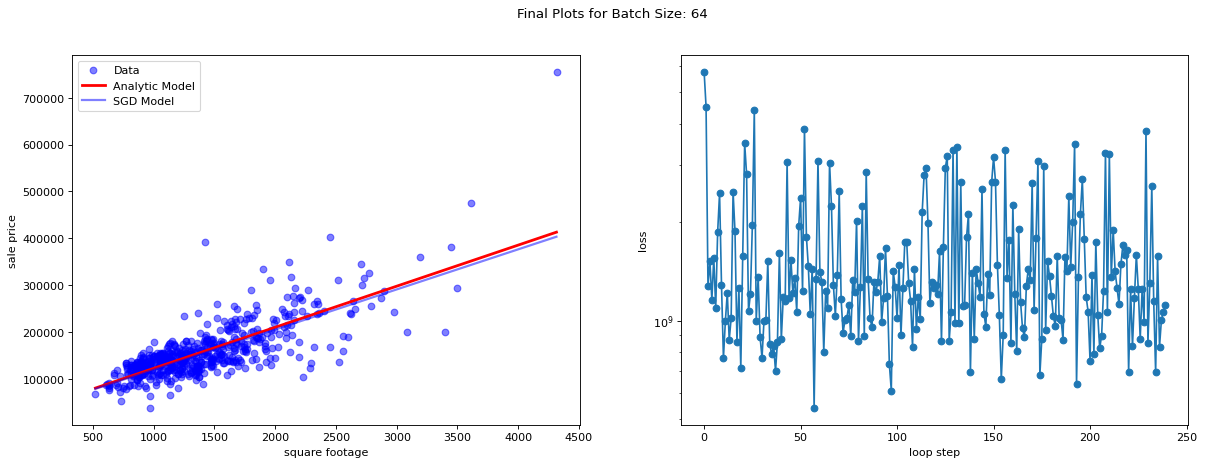

Batch Size: 128
Analytic Model: y_i = 87.6881454948481 * x + 34754.077891844456
SGD Model: y_i = 97.91284808962865 * x + 30471.117714631917
Mean Loss: 2224593556.449987
Learning Rate For m: 2e-07
Learning Rate for b: 0.2


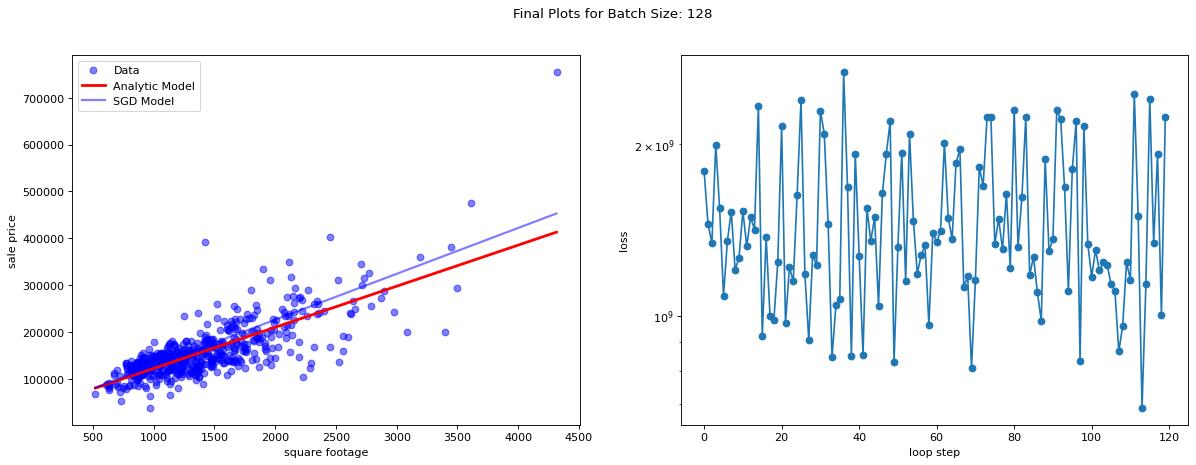

Batch Size: 256
Analytic Model: y_i = 87.6881454948481 * x + 34754.077891844456
SGD Model: y_i = 87.94603997129798 * x + 34101.75255446647
Mean Loss: 1834366542.4442635
Learning Rate For m: 4e-07
Learning Rate for b: 0.4


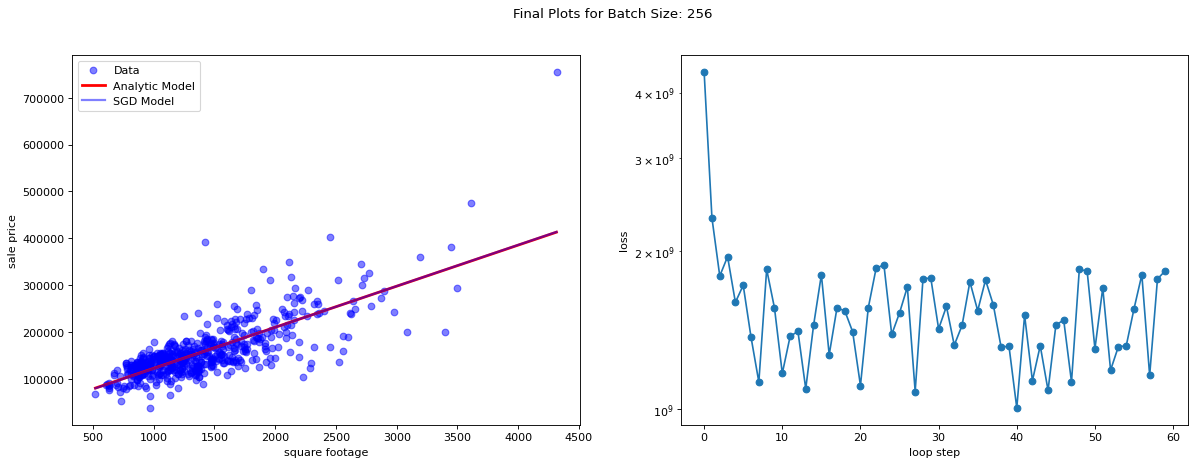

Batch Size: 512
Analytic Model: y_i = 87.6881454948481 * x + 34754.077891844456
SGD Model: y_i = 83602.43806077237 * x + 18709087.076547623
Mean Loss: 2.03875847284186e+16
Learning Rate For m: 8e-07
Learning Rate for b: 0.8


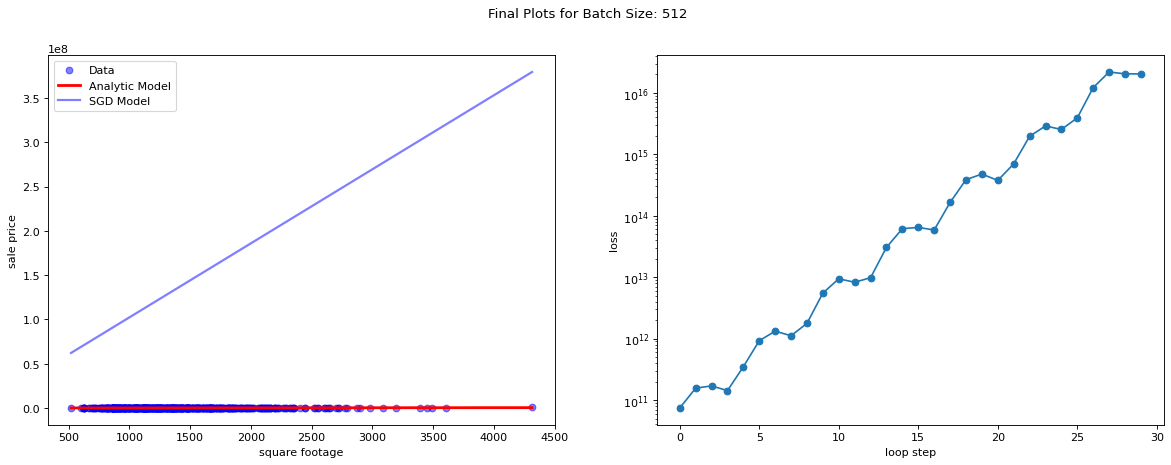

In [17]:
# set the array of batch sizes 
batch_sizes = 64 * np.array([2**i for i in range(4)])

# set the number of epochs
epochs = 30

# Now performing SGD for each of the batch size
for num, batch_size in enumerate(batch_sizes):
    # set the initial values of m and b inside of this loop so that
    # they are reset to original guess values for each batch size
    m = 5.
    b = 1000.
    
    # Print the batch size
    print(100*'=')
    print(f"Batch Size: {batch_size}")
    
    # obtain the number of iterations
    num_iterations = len(data)//batch_size
    
    
    # set a learning rate for each parameter
    learning_rate_m = 1e-7 * (2 ** num) 
    learning_rate_b = 1e-1 * (2 ** num)
    
    
    # use these to plot our progress over time
    loss_history = []
    
    # the number of times entire dataset is trained is the epochs
    loop_N = epochs
    
    
    for i in range(loop_N):
        
        for j in range(num_iterations):
    
            # Sample a batch of data according to batch size
            data_batch = data.sample(batch_size)
            
             # convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
            data_x = data_batch['GrLivArea'].to_numpy()
            data_y = data_batch['SalePrice'].to_numpy()
    
            # update our slope and intercept based on the current values
            m = updated_m(data_x,data_y,m,b,learning_rate_m)
            b = updated_b(data_x,data_y,m,b,learning_rate_b)

            # calculate the loss value
            loss_value = np.mean(loss(data_x,data_y,m,b))

            # keep a history of our loss values
            loss_history.append(loss_value)

            # close/delete previous plots
            # plt.close('all')
            
            if (i == loop_N-1  and j == num_iterations-1):
                print(f"Analytic Model: y_i = {m_calc} * x + {b_calc}")
                print(f"SGD Model: y_i = {m} * x + {b}")
                print(f"Mean Loss: {loss_value}")
                print(f"Learning Rate For m: {learning_rate_m}")
                print(f"Learning Rate for b: {learning_rate_b}")
              
                # create a 1 by 2 plot grid
                fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
                # plot our usual output
                plot_data(data['GrLivArea'], data['SalePrice'], m_calc, b_calc, ax[0])
        

                # here we also plot the calculated linear fit for comparison
                line_x = np.arange(data['GrLivArea'].min(), data['GrLivArea'].max())
                line_y = line_x * m + b
                ax[0].plot(line_x,line_y,label='SGD Model', linewidth=2, alpha=0.5, color='b')
                # add a legend to the plot and x/y labels
                ax[0].legend()
                ax[0].set_xlabel('square footage')
                ax[0].set_ylabel('sale price')

                # plot the loss 
                loss_x = np.arange(0,len(loss_history))
                loss_y = np.asarray(loss_history)
                ax[1].plot(loss_x,loss_y, 'o-')
                ax[1].set_yscale('log')
                ax[1].set_xlabel('loop step')
                ax[1].set_ylabel('loss')
                fig.suptitle(f"Final Plots for Batch Size: {batch_size}")
                plt.show()
                # gives us time to see the plot
                # time.sleep(2.5)
                # clears the plot when the next plot is ready to show.
                # ipydis.clear_output(wait=True)